<a href="https://colab.research.google.com/github/Eliezer19Garcia/Machine_Learning/blob/main/ML_S3(Separation%26test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics


boston=pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
def rmse(objetivo, estimaciones):
    return np.sqrt(metrics.mean_squared_error(objetivo, estimaciones)
                  )

def adjusted_r2(objetivo, estimaciones, n, k):
    r2 = metrics.r2_score(objetivo, estimaciones)
    return 1 - (1-r2)*(n-1) / (n - k - 1)

def evaluar_modelo(objetivo, estimaciones, n, k):
    return {
        "rmse": rmse(objetivo, estimaciones),
        "mae": metrics.mean_absolute_error(objetivo, estimaciones),
        "adjusted_r2": adjusted_r2(objetivo, estimaciones, n, k)
           }
def root_mean_squared_error(objetivo, estimaciones):
    return{
        'root_mean_squared_error': metrics.root_mean_squared_error(objetivo, estimaciones)
    }

In [ ]:
# Fit and predictions
modelo_ols = LinearRegression()

boston_expl=boston.drop('MEDV', axis=1)
boston_target=boston['MEDV']

modelo_ols.fit(boston_expl, boston_target)

modelo_ols_perds= modelo_ols.predict(boston_expl)


In [ ]:
RESULTADOS = {}

In [ ]:
N = boston.shape[0]

RESULTADOS["ols"] = evaluar_modelo(
    boston_target,
    modelo_ols_perds,
    N,
    len(modelo_ols.coef_)
)

RESULTADOS



{'ols': {'rmse': np.float64(4.679191295697281),
  'mae': 3.270862810900316,
  'adjusted_r2': 0.733789726372463}}

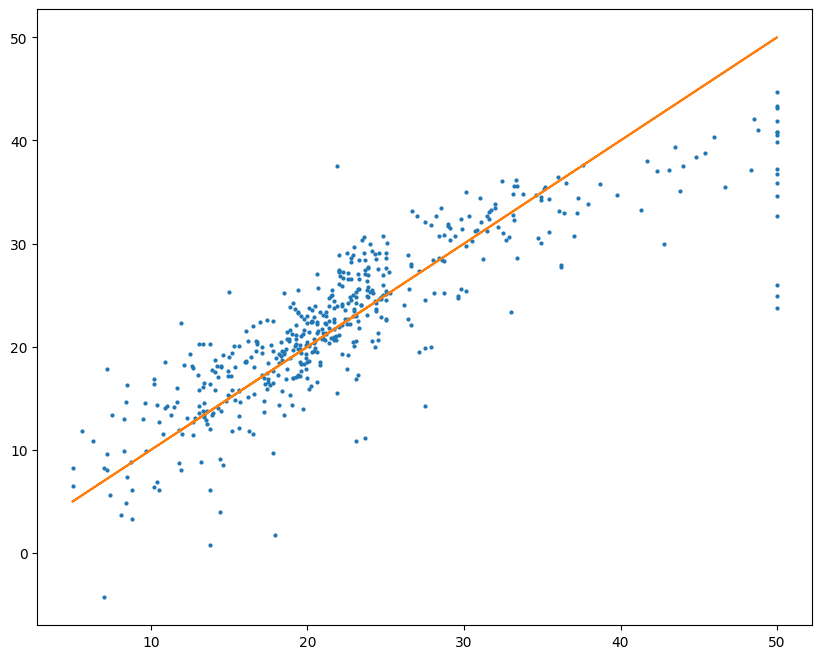

In [ ]:
def qq_plot(target, predictions):
  plt.figure(figsize=(10,8))
  plt.plot(target, predictions, 'o', markersize=2)
  plt.plot(target, target, '-')
  plt.show()

qq_plot(boston_target, modelo_ols_perds)

In [ ]:
# Now we gonna split the data to train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(boston_expl, boston_target, test_size=0.33, random_state=13)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

model_1 = LinearRegression()
model_1.fit(x_train, y_train)

print(model_1.coef_, model_1.intercept_)


model_1_preds = model_1.predict(x_test)

RESULTADOS["ols_train"] = evaluar_modelo(
    y_train,
    model_1.predict(x_train),
    x_test.shape[0],
    len(model_1.coef_)
)

RESULTADOS['old_test']=evaluar_modelo(
    y_test,
    model_1.predict(x_test),
    x_test.shape[0],
    len(model_1.coef_)
)

display(pd.DataFrame(RESULTADOS))






(339, 13) (339,)
(167, 13) (167,)
[-1.62247915e-01  6.04934413e-02  1.19068521e-02  3.92827458e+00
 -1.21499389e+01  3.40553680e+00  5.85293339e-03 -1.43670161e+00
  3.69431633e-01 -1.41076708e-02 -9.75342185e-01  8.27579593e-03
 -5.94871223e-01] 37.343088054121935


,ols,ols_split,ols_train,old_test
rmse,4.679191,4.784178,4.721732,4.784178
mae,3.270863,3.558434,3.300868,3.558434
adjusted_r2,0.733790,0.688716,0.719881,0.688716


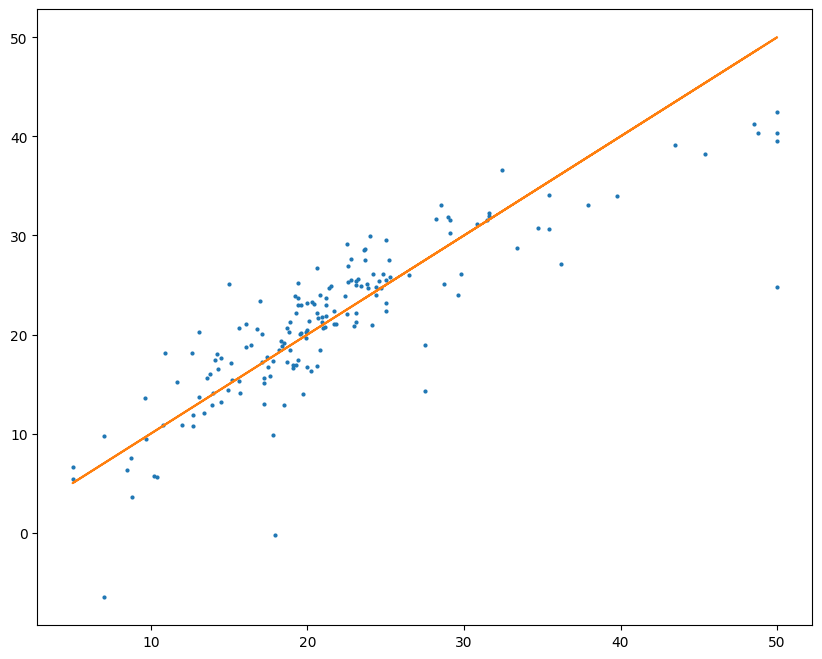

In [ ]:
qq_plot(y_test, model_1_preds)

In [ ]:
# now with random_state =42
x_train, x_test, y_train, y_test = train_test_split(boston_expl, boston_target, test_size=0.33, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

model_1 = LinearRegression()
model_1.fit(x_train, y_train)

print(model_1.coef_, model_1.intercept_)


model_1_preds = model_1.predict(x_test)

RESULTADOS={}

RESULTADOS["ols_train"] = evaluar_modelo(
    y_train,
    model_1.predict(x_train),
    x_test.shape[0],
    len(model_1.coef_)
)

RESULTADOS['old_test']=evaluar_modelo(
    y_test,
    model_1.predict(x_test),
    x_test.shape[0],
    len(model_1.coef_)
)

display(pd.DataFrame(RESULTADOS))


(339, 13) (339,)
(167, 13) (167,)
[-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
 -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
  2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
 -5.47566338e-01] 33.334975755635966


,ols_train,old_test
rmse,4.794269,4.552365
mae,3.376419,3.148256
adjusted_r2,0.717078,0.702889


Always we want to get a value in rmse of the train less than in the test, if its the other way around, then something strage is happening with that random_state (seed)

Thats why in the practice we generate models with different seeds to know what is the errror range in wich our model could be

In [ ]:
model=LinearRegression()
results = []
def test_seed(seed):
    X_train, X_test, y_train, y_test = train_test_split(
     boston_expl, boston_target,
     test_size=0.33, random_state=seed
    )
    test_preds = model.fit(X_train, y_train).predict(X_test)
    seed_rmse = rmse(y_test, test_preds)
    results.append([seed_rmse, seed])


In [ ]:
for i in range(1000):
    test_seed(i)

In [ ]:
results[:5]
results_sorted=sorted(results, key=lambda x: x[0], reverse=False)
results_sorted[0]
results_sorted[-1]


[np.float64(6.788054714003122), 645]

#Cross Validation:
We generate multiple seeds and avaranged the error

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score?

In [ ]:
model_ols = LinearRegression()
cv_results=cross_val_score(
                estimator=model_ols,
                X= boston_expl,
                y=boston_target,
                cv=10,
                scoring='neg_mean_squared_error')


In [ ]:
print(cv_results, '\n\n',cv_results.mean()) # the values are the mean_squared_error of each partition in negative

[  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068] 

 -34.705255944524914


In [ ]:
def rmse_cv(estimator, X, y):
  y_pred = estimator.predict(X)
  return metrics.root_mean_squared_error(y, y_pred)

In [ ]:
results_cv = []
for i in range(10,200):
  cv_rmse= cross_val_score(
      estimator=model_ols,
      X=boston_expl,
      y=boston_target,
      cv=i,
      scoring=rmse_cv
  )
  results_cv.append([cv_rmse.mean(), i])


<Axes: xlabel='x', ylabel='rmse'>

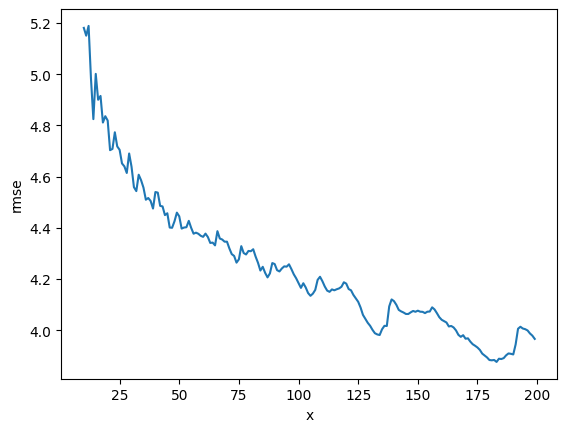

In [ ]:
sns.lineplot(data=pd.DataFrame(results_cv, columns=['rmse', 'x']), x="x", y="rmse")

In [ ]:
from sklearn.model_selection import cross_validate
scoring = {"mae": "neg_mean_absolute_error", "rmse": rmse_cv}
estimator = modelo_ols
scores = cross_validate(estimator, boston_expl,
                        boston_target, scoring=scoring,
                         cv=100, return_train_score=True)

In [ ]:
pd.DataFrame(scores).mean()

,0
fit_time,0.003858
score_time,0.004888
test_mae,-3.511687
train_mae,-3.270699
test_rmse,4.184166
train_rmse,4.676971


Lo anterior dice que se realizo el calculo de los errores a aprtir de validacion cruzada (generar el modelo con diferentes particiones (tanto tamaño como semilla)) y se obtuvueron los errores, en scoring a aprtir de un diccionario se especifica que tipo de scoring quieres calcular, y cv es el numero de particiones que hará, por lo tanto concluimos que el error es de +- 4.67 de la prediccion del modelo, qué modelo ocuparemos, no interesa utilioza el que sea y agrega el error, que al final es el que importaba